Total missing values after dropping rows: 0

                    DECISION TREE CLASSIFICATION REPORT

Target Column (Dependent Variable):
  - loan_status

Feature Columns (Independent Variables):
  - age
  - years_employed
  - annual_income
  - credit_score
  - credit_history_years
  - savings_assets
  - current_debt
  - defaults_on_file
  - delinquencies_last_2yrs
  - derogatory_marks
  - loan_amount
  - interest_rate
  - debt_to_income_ratio
  - loan_to_income_ratio
  - payment_to_income_ratio
  - occupation_status_Employed
  - occupation_status_Self-Employed
  - occupation_status_Student
  - product_type_Credit Card
  - product_type_Line of Credit
  - product_type_Personal Loan
  - loan_intent_Business
  - loan_intent_Debt Consolidation
  - loan_intent_Education
  - loan_intent_Home Improvement
  - loan_intent_Medical
  - loan_intent_Personal

Class Distribution in Target (loan_status):
  - Class 0: 22477 samples
  - Class 1: 27523 samples

Model Performance:
  - Training Accuracy: 

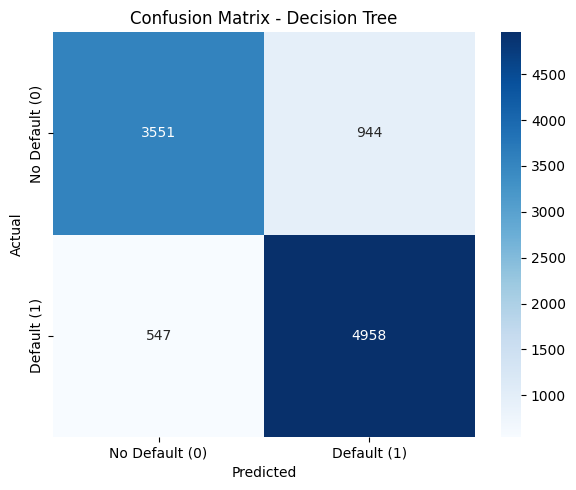

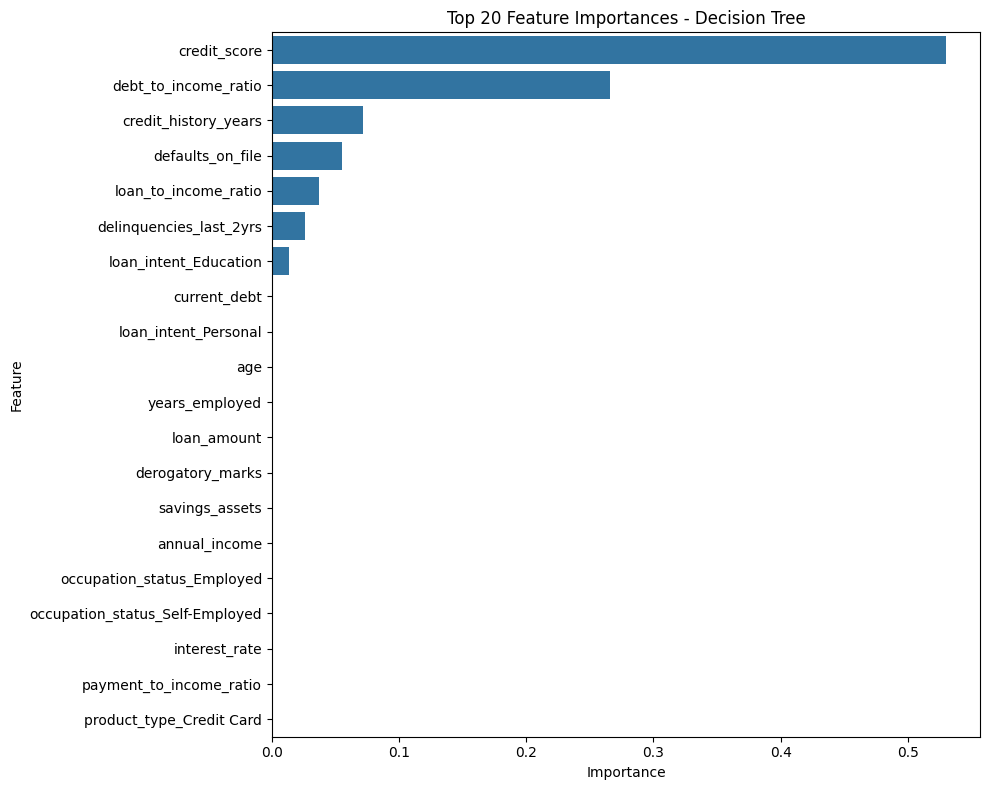

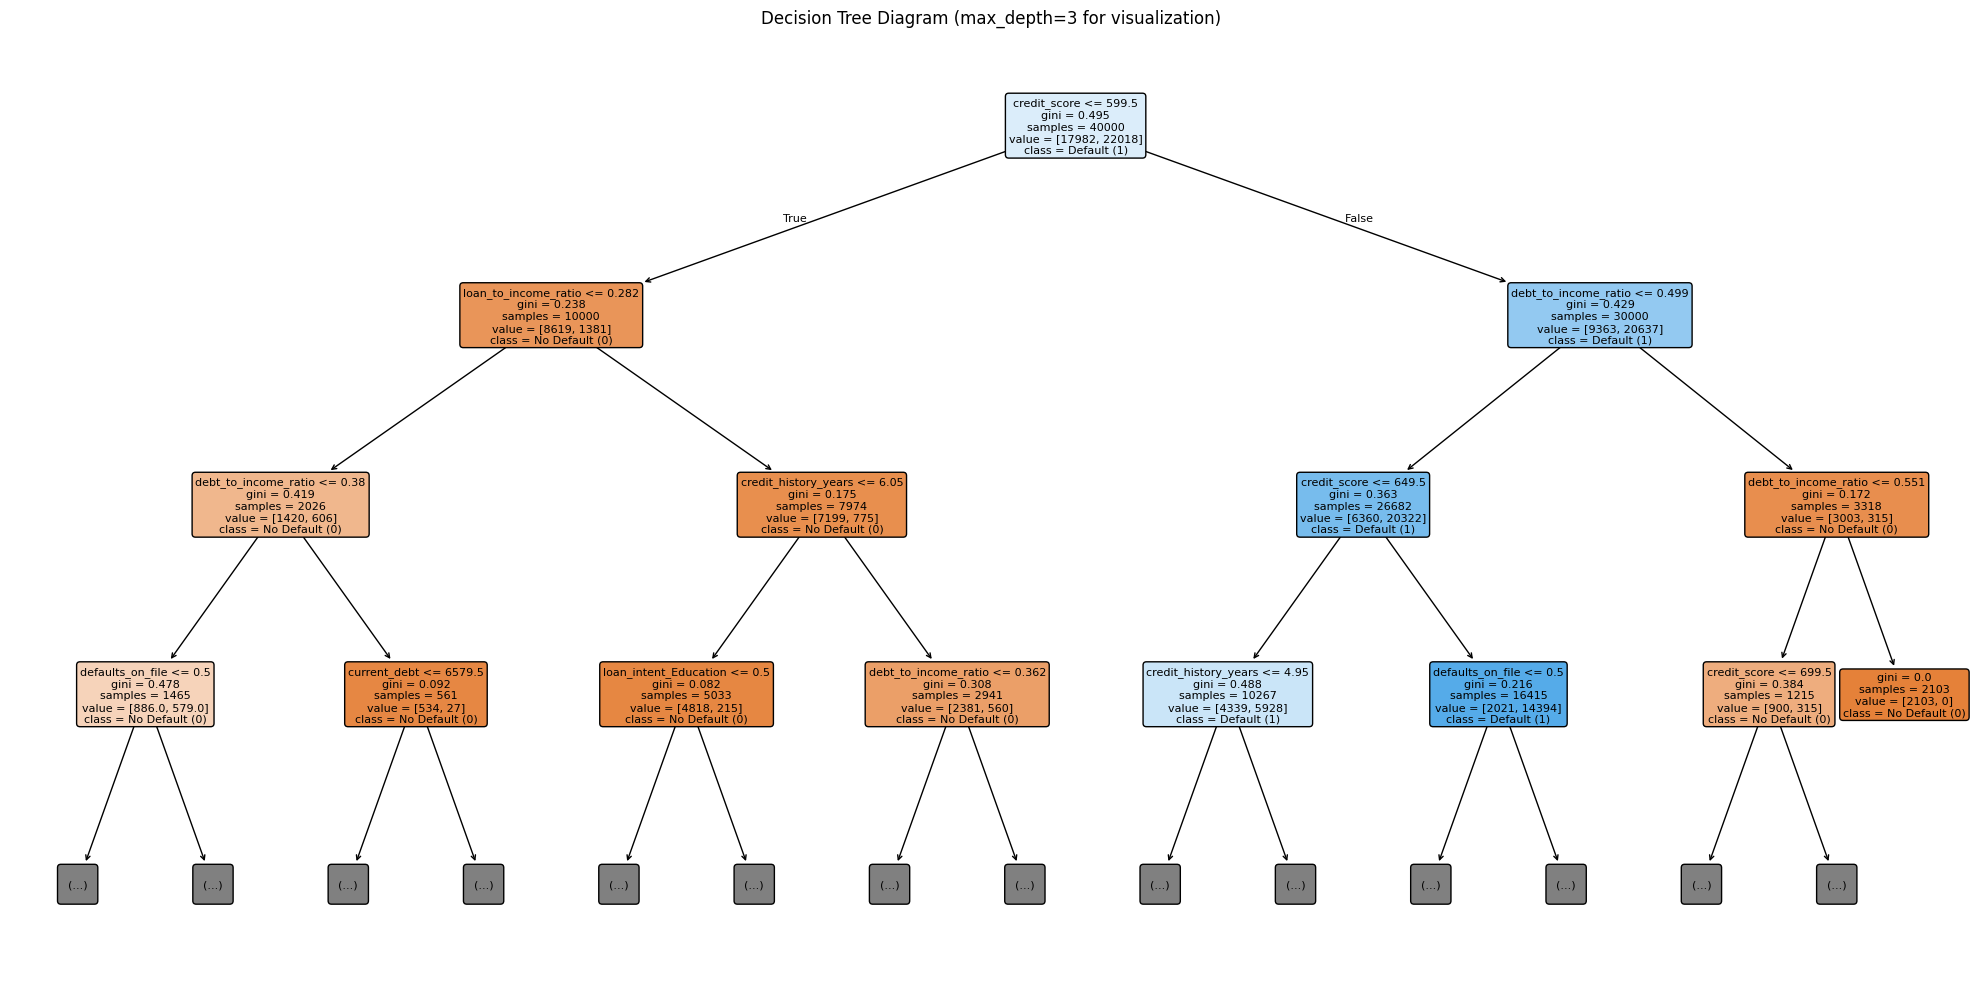

In [ ]:
# ----------------------------------------------------------
# Decision Tree Classification on Loan_approval_data_2025.csv
# ----------------------------------------------------------

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# For inline plots in Colab
%matplotlib inline

# ----------------------------------------------------------
# 1. LOAD DATA & BASIC CLEANING
# ----------------------------------------------------------

# Load the dataset
df = pd.read_csv('Loan_approval_data_2025.csv')

# Drop non-predictive identifier
if 'customer_id' in df.columns:
    df = df.drop(columns=['customer_id'])

# Check and drop rows with missing values (any column)
missing_before = df.isnull().sum().sum()
if missing_before > 0:
    df = df.dropna()

# Confirm there are no missing values now
print("Total missing values after dropping rows:", df.isnull().sum().sum())

# ----------------------------------------------------------
# 2. ONE-HOT ENCODING FOR SPECIFIC CATEGORICAL COLUMNS
# ----------------------------------------------------------

# Categorical columns to encode
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

# Sanity check: Ensure columns exist
for col in categorical_cols:
    if col not in df.columns:
        raise ValueError(f"Expected categorical column '{col}' not found in dataset.")

# One-hot encode with drop_first=False (for interpretability)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# ----------------------------------------------------------
# 3. DEFINE TARGET AND FEATURES
# ----------------------------------------------------------

target_col = 'loan_status'

# Check that target exists
if target_col not in df_encoded.columns:
    raise ValueError(f"Target column '{target_col}' not found after encoding.")

# Separate features and target
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

feature_cols = X.columns.tolist()

# ----------------------------------------------------------
# 4. TRAIN-TEST SPLIT
# ----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 5. TRAIN DECISION TREE CLASSIFIER
# ----------------------------------------------------------

# Decision Tree with limited depth to control overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# ----------------------------------------------------------
# 6. PREDICTIONS & EVALUATION
# ----------------------------------------------------------

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Classification report (on test set)
class_report = classification_report(y_test, y_test_pred, digits=4)

# Class distribution
class_counts = y.value_counts().sort_index()  # index 0,1

# ----------------------------------------------------------
# 7. STRUCTURED TEXT REPORT
# ----------------------------------------------------------

print("\n" + "=" * 70)
print("                    DECISION TREE CLASSIFICATION REPORT")
print("=" * 70)

print(f"\nTarget Column (Dependent Variable):\n  - {target_col}")

print("\nFeature Columns (Independent Variables):")
for col in feature_cols:
    print(f"  - {col}")

print("\nClass Distribution in Target (loan_status):")
for cls, cnt in class_counts.items():
    print(f"  - Class {cls}: {cnt} samples")

print("\nModel Performance:")
print(f"  - Training Accuracy: {train_accuracy:.4f}")
print(f"  - Testing  Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(class_report)

print("=" * 70 + "\n")

# ----------------------------------------------------------
# 8. VISUALIZATIONS
# ----------------------------------------------------------

# 8.1 Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

# 8.2 Feature Importance Plot
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
})

# Sort by importance descending
feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 8.3 Decision Tree Diagram (max_depth=3 for readability)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=feature_cols,
    class_names=['No Default (0)', 'Default (1)'],
    filled=True,
    max_depth=3,       # limit depth in the visualization
    rounded=True,
    fontsize=8
)
plt.title('Decision Tree Diagram (max_depth=3 for visualization)')
plt.tight_layout()
plt.show()


# New Section